In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('goemotions_1.csv')
df2 = pd.read_csv('goemotions_2.csv')
df3 = pd.read_csv('goemotions_3.csv')

In [3]:
df = df1.append(df2).reset_index()
df = df.append(df3).reset_index()
df = df.drop(columns = ['level_0', 'index'])

In [4]:
raw = df

In [5]:
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  

In [7]:
df['created_utc'] = pd.to_datetime(df['created_utc'])
df = df.drop(columns = ['created_utc'])

In [8]:
len(df['rater_id'].unique())

82

In [9]:
cols = df.columns
cols

Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'rater_id',
       'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance',
       'approval', 'caring', 'confusion', 'curiosity', 'desire',
       'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral'],
      dtype='object')

In [11]:
df = df.groupby(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id','example_very_unclear']).sum()
df = df.drop(columns=['rater_id']).reset_index()

In [12]:
df.head()

,text,id,author,subreddit,link_id,parent_id,example_very_unclear,admiration,amusement,anger,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,"""If you don't wear BROWN AND ORANGE...YOU DON...",ee3fxil,pj7140,Browns,t3_afy4f0,t3_afy4f0,False,0,0,1,...,0,0,1,0,0,0,0,0,0,2
1,"""What do Scottish people look like?"" How I wo...",ee7cu0z,Cheezeburger_Picnic,Scotland,t3_agmpx9,t3_agmpx9,False,0,0,0,...,2,0,0,0,0,0,0,0,0,0
2,"### A surprise, to be sure, but a welcome one",edglo8q,GPFlopi,youseeingthisshit,t3_ad1hnf,t3_ad1hnf,False,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,"'*Pray*, v. To ask that the laws of the unive...",edcjn6t,DarrenFromFinance,exchristian,t3_ad0jpf,t3_ad0jpf,False,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,">it'll get invaded by tankie, unfortunately. ...",eevxqzo,BarrelMaker69,BreadTube,t3_ajbca2,t1_eevv6db,False,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [13]:
emotions = np.array(df[['admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral']])

In [14]:
emotion_feats = ['admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral']
emotion_feats = np.array(emotion_feats)

In [15]:
#find max rated emotion for each text
max_idxs = np.argmax(emotions, axis = 1)

In [16]:
#np indexing to get column of emotions
emotions_grouped = emotion_feats[max_idxs]

In [17]:
df = df.drop(columns=['admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral']).reset_index()
df['emotion_classification'] = emotions_grouped
df = df.drop(columns = ['index'])

In [18]:
df.head()

,text,id,author,subreddit,link_id,parent_id,example_very_unclear,emotion_classification
0,"""If you don't wear BROWN AND ORANGE...YOU DON...",ee3fxil,pj7140,Browns,t3_afy4f0,t3_afy4f0,False,annoyance
1,"""What do Scottish people look like?"" How I wo...",ee7cu0z,Cheezeburger_Picnic,Scotland,t3_agmpx9,t3_agmpx9,False,curiosity
2,"### A surprise, to be sure, but a welcome one",edglo8q,GPFlopi,youseeingthisshit,t3_ad1hnf,t3_ad1hnf,False,surprise
3,"'*Pray*, v. To ask that the laws of the unive...",edcjn6t,DarrenFromFinance,exchristian,t3_ad0jpf,t3_ad0jpf,False,neutral
4,">it'll get invaded by tankie, unfortunately. ...",eevxqzo,BarrelMaker69,BreadTube,t3_ajbca2,t1_eevv6db,False,neutral


In [19]:
emotion_classification = df['emotion_classification'].unique()
emotion_classification

array(['annoyance', 'curiosity', 'surprise', 'neutral', 'admiration',
       'disapproval', 'approval', 'anger', 'amusement', 'fear',
       'excitement', 'disappointment', 'gratitude', 'sadness', 'caring',
       'joy', 'optimism', 'disgust', 'remorse', 'love', 'confusion',
       'realization', 'embarrassment', 'pride', 'relief', 'desire',
       'grief', 'nervousness'], dtype=object)

In [22]:
emotion_class_counts = df.groupby('emotion_classification').count()

In [23]:
emotion_class_counts = emotion_class_counts.sort_values('text', ascending = False).reset_index()

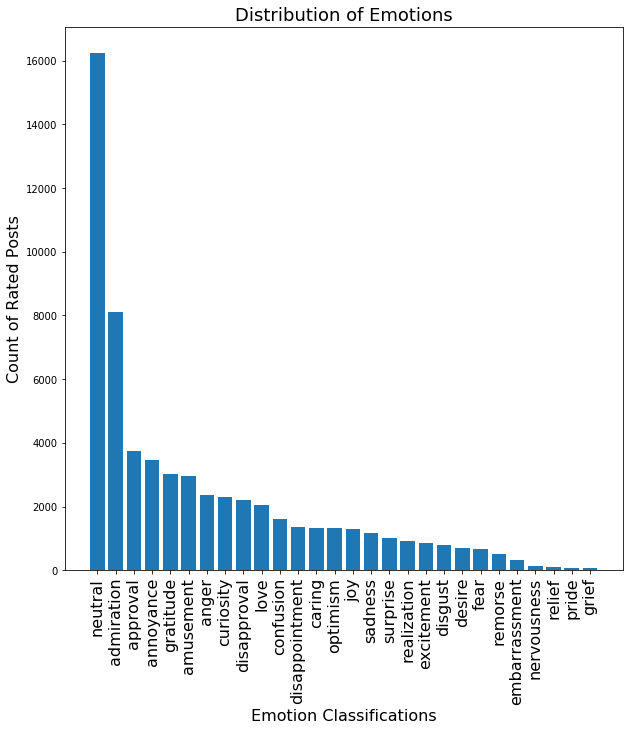

In [26]:
fig, ax = plt.subplots(figsize = (10,10))
x = np.arange(len(emotion_class_counts['emotion_classification']))
ax.bar(emotion_class_counts['emotion_classification'], emotion_class_counts['text'])
ax.set_xticks(x)
ax.set_xticklabels(emotion_class_counts['emotion_classification'], rotation='vertical', fontsize = 16)
ax.set_title('Distribution of Emotions', fontsize = 18)
ax.set_xlabel('Emotion Classifications', fontsize = 16)
ax.set_ylabel('Count of Rated Posts', fontsize = 16)
# fig.savefig('../images/emotion_counts.jpeg');

### Grouping classifications into Positive, Negative, Neutral

Positive
'surprise'
'approval'
'amusement'
'caring'
'love'
'desire'
'embarrassment'
'pride'
'joy'
'optimism'
'relief'
'excitement'
'curiosity'
'gratitude'
'realization'

Negative
'annoyance'
'sadness'
'grief'
'nervousness'
'confusion'
'anger'
'fear'
'disgust'
'disapproval'
'disappointment'
'remorse'

Neutral
'neutral

In [27]:
positive_lst = ['surprise', 'approval', 'amusement', 'caring', 'love', 'desire', 'embarrassment', 'pride', 'joy', 'optimism', 'relief', 'excitement', 'curiosity', 'gratitude', 'realization']

negative_lst = ['annoyance', 'sadness', 'grief', 'nervousness', 'confusion', 'anger', 'fear', 'disgust', 'disapproval', 'disappointment', 'remorse']

In [28]:
df['tone'] = 'neutral'


In [29]:
df['tone'][df['emotion_classification'].isin(positive_lst)] = 'positive'
df['tone'][df['emotion_classification'].isin(negative_lst)] = 'negative'

/Users/jamiewessels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jamiewessels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
# df.to_csv('grouped_emotions.csv')

In [34]:
tone_class_counts = df.groupby('tone').count().reset_index()

In [39]:
tone_class_counts = tone_class_counts.sort_values('text', ascending = False)

In [40]:
tone_class_counts

,tone,text,id,author,subreddit,link_id,parent_id,example_very_unclear,emotion_classification
1,neutral,24372,24372,24372,24372,24372,24372,24372,24372
2,positive,22016,22016,22016,22016,22016,22016,22016,22016
0,negative,14354,14354,14354,14354,14354,14354,14354,14354


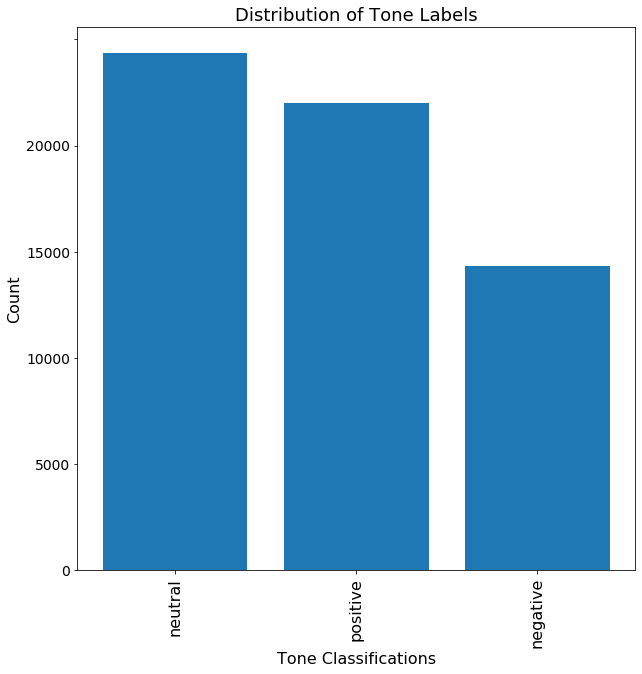

In [44]:
fig, ax = plt.subplots(figsize = (10,10))
x = np.arange(len(tone_class_counts['tone']))
ax.bar(tone_class_counts['tone'], tone_class_counts['text'])
ax.set_xticks(x)
ax.set_xticklabels(tone_class_counts['tone'], rotation='vertical', fontsize = 16)
ax.set_yticklabels(np.arange(0, 25000, 5000), fontsize = 14)
ax.set_title('Distribution of Tone Labels', fontsize = 18)
ax.set_xlabel('Tone Classifications', fontsize = 16)
ax.set_ylabel('Count', fontsize = 16)
fig.savefig('../images/tone_counts.jpeg');